In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
import io
import re
from nltk.tokenize.toktok import ToktokTokenizer
import unicodedata

# plot japanese lang
!pip install japanize-matplotlib
import japanize_matplotlib

tf.enable_eager_execution()

     |████████████████████████████████| 4.1MB 2.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=3e31c0d98d0bb964c0766f4d5864e5b35bca9ea1b0baed604a16c7d249d03e1a
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


# load text file

this dataset is aleady implemented a SentenceSpace

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# create each languages list
def create_lang_list(num_example):
    # load txt file
    lines =  io.open("/content/drive/My Drive/Colab Notebooks/raw.txt", encoding='UTF-8').read().strip().split('\n')

    word_pairs = [[w for w in l.split('\t')]  for l in lines[:num_example]]

    return zip(*word_pairs)

In [5]:
# e.g.
english_text, japanese_text = create_lang_list(20)
english_text[:11]

("you are back, aren't you, harold?",
 'my opponent is shark.',
 'this is one thing in exchange for another.',
 "yeah, i'm fine.",
 "don't come to the office anymore. don't call me either.",
 'looks beautiful.',
 'get him out of here, because i will fucking kill him.',
 'you killed him!',
 'okay, then who?',
 'it seems a former employee...',
 'so where are they?')

# Text Pre-processing

 **Removing accented characters**
 e.g. é → e.
 
 **Expanding Contractions**
e.g. don't → do not, I'd → I would


**remove special word**
e.g. remove "123#@!"


**Stemming**
e.g. corder, codes → code


**Lemmatization**
e.g. better → good


**Tokenize**
 e.g. I am going to restaurant → [[I], [am], [going], [to], [restaurant]]


# Removing accented characters

English might have accent like é but Japanese doesn't have any accent
I just create different function to ascii for Japanese and English

In [0]:
# Removing accented characters
def english_unicode_to_ascii(text):
     return ''.join(ascii_text for ascii_text in unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

def japanese_unicode_to_ascii(text):
    return ''.join(ascii_text for ascii_text in unicodedata.normalize('NFKD', text))

In [7]:
# e.g.
japanese_unicode_to_ascii("こんにちは。今日は"), english_unicode_to_ascii("Hello world é ")

('こんにちは。今日は', 'Hello world e ')

# Expanding Contractions

Japanese doesn't have a Contraction words so I just create a one function to expand Contractions for Engish

In [0]:
def expand_constraction(text):

    #  dic for expand constraction words
    constraction_dict= {
        "ain't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }

    #  define match pattern
    #  IGNORECASE → no matter if word is lowercase or uppercase
    #  DOTAIL → . is going to match \n
    contraction_pattern = re.compile('({})'.format('|'.join(constraction_dict.keys())),
                                                  flags=re.IGNORECASE | re.DOTALL)
    #  expand words
    def expand_match(constraction):
        # get constraction word
        match = constraction.group(0)
        first_char = match[0]
        #  get expand word from constraction dict
        expand_constraction = constraction_dict.get(match)\
                                                    if constraction_dict.get(match) \
                                                    else constraction_dict.get(match.lower())
        
        # create expand constraction
        expand_constraction = first_char + expand_constraction[1:]
        return expand_constraction
    
    expanded_text = contraction_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [10]:
# e.g.
expand_constraction("you're good I'd like to go he's she's")

'you are good I would like to go he is she is'

# remove special characters and create space between word and punctuation

replacing everything with space except(a-z, A-Z, ".",  "?",  "!",  ",", "-", "ー", , "。", "Kanji", "Katakana", "Hiragana")
create space between word and punctuation (? ! . , 、 。)

In [0]:
def replace_special_character_to_space(text):
    pattern = r"[^a-zA-Z\u3041-\u309F\u30A1-\u30FF\uFF66-\uFF9F\u4E00-\u9FD0\u309B\u3099\uFF9E\u309C\u309A\uFF9F?!\-/\s]+"
    text = re.sub(pattern, '', text).rstrip().strip()
    text = text.replace("・" , "")

    text = re.sub(r"([?!.,。、])", r" \1 ", text)
    text = text.lower()

    return text

In [13]:
# e.g.
replace_special_character_to_space("hello, . #@…123world."), replace_special_character_to_space("こん・にちは。・ いい天気。")

('hello  world', 'こんにちは いい天気')

# Stemming and Lemmatization

I will do stemming only english which can create a base form of a word from a given word.
Japanese language doesn't need a stemming

In [0]:
def stemmer_word(text):
    ps = nltk.stem.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [15]:
# e.g.
stemmer_word("hello world she has cat but he had dogs he is went to traveling")

'hello world she ha cat but he had dog he is went to travel'

# Text normalize

I will normalize English text and Japanese text using function which is defined so far

In [0]:
def normalize_english(english_text, japanese_text):
    
    input_value = ()
    target_value = ()
    
    for en_text, ja_text in zip(english_text, japanese_text):
        
        # normalize English
        en_text = english_unicode_to_ascii(en_text)
        en_text = expand_constraction(en_text)
        en_text = replace_special_character_to_space(en_text)

        en_text = "<sos> " + en_text + " <eos>"
        
        input_value += (en_text, )

        # normalize Japanese
        ja_text = japanese_unicode_to_ascii(ja_text)
        ja_text = expand_constraction(ja_text)
        ja_text = replace_special_character_to_space(ja_text)

        ja_text = "<sos> " + ja_text + " <eos>"
        
        target_value += (ja_text, )

    return input_value, target_value

In [0]:
input_value, target_value = normalize_english(english_text, japanese_text)

In [18]:
print(input_value[:3])
print(target_value[:3])

('<sos> you are back are not you harold ?  <eos>', '<sos> my opponent is shark <eos>', '<sos> this is one thing in exchange for another <eos>')
('<sos> あなたは戻ったのね ハロルド ?  <eos>', '<sos> 俺の相手は シャークだ <eos>', '<sos> 引き換えだ ある事とある物の <eos>')


# tokenize
tokenize each language word based on space

In [0]:
def tokenize(lang):
    # vectorize a text corpus
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
        filters=' ')

    # updates internal vocabulary based on a list of texts
    # e.g. "[this place is good ]"→{this:2, place:3, is:1, good:4} "
    lang_tokenizer.fit_on_texts(lang)

    # Transforms each text in texts to a sequence of integers.
    # e.g. this place is good → [[2, 3, 1, 4]]
    tensor = lang_tokenizer.texts_to_sequences(lang)

    # transform a list of num sample into a 2D Numpy array of shape 
    # Fixed length because length of sequence of integers are different
    # return (len(sequences), maxlen)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                          padding='post')
    return tensor, lang_tokenizer

In [20]:
# e.g.
tokenize(['this place is good', "こんにちは 今日は いい天気 。", "today is so cold"])

(array([[ 2,  3,  1,  4],
        [ 5,  6,  7,  8],
        [ 9,  1, 10, 11]], dtype=int32),
 <keras_preprocessing.text.Tokenizer at 0x7f611e075b70>)

# create clean dataset

In [0]:
# cleate a clean dataset
def create_dataset(num_example):
    # load a text data
    english_text, japanese_text = create_lang_list(num_example)
    # normalize text data     
    input_lang, target_lang = normalize_english(english_text, japanese_text)
    
    # input_tensor, target_tensor: 2d numpy array
    # input_lang_tokenize, target_lang_tokenize: word dictionary
    input_tensor, input_lang_tokenize = tokenize(input_lang)
    target_tensor, target_lang_tokenize = tokenize(target_lang)

    return input_tensor, target_tensor, input_lang_tokenize, target_lang_tokenize

In [0]:
# return max length
def max_length(tensor):
    return max(len(t) for t in tensor)

In [0]:
# limit datasize for test
num_example = 20000
# get data
input_tensor, target_tensor, input_lang, target_lang = create_dataset(num_example)
# Calculate max_length of the target tensors
max_length_target, max_length_input = max_length(target_tensor), max_length(input_tensor)

In [24]:
# create trainnig set and validation set
input_tensor_train, input_tensor_val, \
    target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2, random_state=42)

# show length
print(len(input_tensor_train), len(input_tensor_val), len(target_tensor_train), len(target_tensor_val))

16000 4000 16000 4000


In [0]:
def convert(lang, tensor):
    for t in tensor:
        if t != 0:
            # Index number assigned to each word
            print("%d----->%s" % (t, lang.index_word[t]))

In [26]:
print("input lang: index to word mapping")
convert(input_lang, input_tensor_train[10])
print("output lang: index to word mapping")
convert(target_lang, target_tensor_train[10])

input lang: index to word mapping
1-----><sos>
36----->no
7----->?
20----->what
45----->about
704----->leaving
3659----->witnesses
47----->at
9----->a
610----->murder
842----->scene
7----->?
2-----><eos>
output lang: index to word mapping
1-----><sos>
23211----->殺しの目撃者を
23212----->放っておいたそうだな
2-----><eos>


# define parameter

In [27]:
# BUFFER_SIZE >= dataset if smaller than dataset can't shuffle equally
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 128

# if None steps_per_epoch == mum of dataset
steps_per_epoch = len(input_tensor_train)
embedding_dim = 300
units = 512
vocab_inp_size = len(input_lang.word_index) + 1
print('Total unique words in the input: %s' % len(input_lang.word_index))
vocab_tar_size = len(target_lang.word_index) + 1

# create dataset
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
print(dataset)
# split dataset → (dataset % BATCH_SIZE)
# drop_remainder=True → rounddown
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

Total unique words in the input: 13249
<DatasetV1Adapter shapes: ((45,), (18,)), types: (tf.int32, tf.int32)>


In [28]:
example_input_batch, example_target_batch =  next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([Dimension(128), Dimension(45)]),
 TensorShape([Dimension(128), Dimension(18)]))

# load Word2Vec pre train model

I will use pre-train model for embedding for English and Japanese words

In [29]:
import gensim
import gensim.models.keyedvectors as word2vec

# load pre-trian model for Japanese 
ja_word2vec_model = gensim.models.Word2Vec.load('/content/drive/My Drive/jawiki.doc2vec.dbow300d/jawiki.doc2vec.dbow300d.model')

# load pre-train model for English
en_word2vec_model = word2vec.KeyedVectors.load_word2vec_format("/content/drive/My Drive/GoogleNews-vectors-negative300.bin", binary=True, unicode_errors='ignore')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**explore japanese Word2Vec pre-train model**

In [30]:
# similar word with country name
ja_word2vec_model.wv.most_similar("日本")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('アメリカ', 0.6172695159912109),
 ('日本国内', 0.6169887781143188),
 ('米国', 0.5836105346679688),
 ('韓国', 0.583561897277832),
 ('海外', 0.5563584566116333),
 ('アジア', 0.5504777431488037),
 ('中国', 0.5415611863136292),
 ('アジア地域', 0.5271817445755005),
 ('台湾', 0.52516770362854),
 ('アジア諸国', 0.5203936100006104)]

In [31]:
# calculate word and word
ja_word2vec_model.wv.most_similar(positive=["お父さん", "死"], negative=["泣"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('息子', 0.5948961973190308),
 ('お母さん', 0.5658013820648193),
 ('母親', 0.559698760509491),
 ('おばあちゃん', 0.5565805435180664),
 ('父', 0.5533062815666199),
 ('母', 0.5530043840408325),
 ('パパ', 0.5508877635002136),
 ('亡き', 0.5500179529190063),
 ('婚約者', 0.5495285391807556),
 ('死ん', 0.546082615852356)]

In [32]:
# similar word with country name
en_word2vec_model.most_similar("Canada")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Canadian', 0.7513011693954468),
 ('Ontario', 0.6928848028182983),
 ('Nova_Scotia', 0.6792765259742737),
 ('Manitoba', 0.67861008644104),
 ('Alberta', 0.6736730337142944),
 ('Canadians', 0.6654781103134155),
 ('Quebec', 0.6514720320701599),
 ('British_Columbia', 0.6478375196456909),
 ('Peller_Estates_Icewine', 0.6433447003364563),
 ('Saskatchewan', 0.6383945941925049)]

In [33]:
# calculate word and word
en_word2vec_model.most_similar(positive=["programmer", "skill"], negative=["money"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Programmer', 0.4614413380622864),
 ('3D_modeller', 0.4489377737045288),
 ('skils', 0.4471549987792969),
 ('puzzle_solver', 0.4467487633228302),
 ('Jon_Shiring', 0.4382207989692688),
 ('programmers', 0.4363787770271301),
 ('coder', 0.434060662984848),
 ('skills', 0.42342013120651245),
 ('skillset', 0.42207223176956177),
 ('animator', 0.4214385449886322)]

In [0]:
# get weights
# English
input_embedding_matrix = np.zeros((vocab_inp_size, embedding_dim))
for word, i in input_lang.word_index.items():
    if i >= num_example:
        continue
    try:
        input_embedding_matrix[i] = en_word2vec_model.get_vector(word)
    except KeyError:
        continue

# Japanese
target_embedding_matrix = np.zeros((vocab_tar_size, embedding_dim))
for word, i in target_lang.word_index.items():
    if i >= num_example:
        continue
    try:
        target_embedding_matrix[i] = ja_word2vec_model.wv.get_vector(word)
    except KeyError:
        continue

In [35]:
input_embedding_matrix.shape, target_embedding_matrix.shape

((13250, 300), (28963, 300))

# Encoder Model

In [0]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_size, input_embedding_matrix):
        super(Encoder, self).__init__()
        self.batch_size = batch_size
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_inp_size, embedding_dim, 
                                                   weights=[input_embedding_matrix], trainable=True)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                                            return_sequences=True,
                                                            return_state=True,
                                                            recurrent_initializer='glorot_uniform')
        
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state
        
    def initialize_hidden_state(self):
            return tf.zeros((self.batch_size, self.enc_units))

In [37]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE, input_embedding_matrix)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)

print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (128, 45, 512)
Encoder Hidden state shape: (batch size, units) (128, 512)


# attention

In [0]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, nuits):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, query, values):
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(query, 1)
        
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = self.V(tf.nn.tanh(
                self.W1(values) +  self.W2(hidden_with_time_axis)))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights

In [39]:
attention_layer = BahdanauAttention(10)
attention_result , attention_weights = attention_layer(sample_hidden, sample_output)

print("attention result shape: (batch size, units) {}".format(attention_result.shape))
print("attention weight shape:(batch size, sequence_length, 1) {}".format(attention_weights.shape))

attention result shape: (batch size, units) (128, 512)
attention weight shape:(batch size, sequence_length, 1) (128, 45, 1)


# Decoder Model

In [0]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_size, target_embedding_matrix):
        super(Decoder, self).__init__()
        self.batch_size = batch_size
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_tar_size, embedding_dim, 
                                                   weights=[target_embedding_matrix], trainable=True)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                                            return_sequences=True,
                                                            return_state=True,
                                                            recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        self.attention = BahdanauAttention(self.dec_units)
    
    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)
        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        # passing the concatenated vector to the GRU
        output, state =  self.gru(x)
                
        # output shape == (batch_size * 1, hidden_size
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # output  shape == (batch_size, vocab) 
        x = self.fc(output)
        
        return  x, state, attention_weights

In [41]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE, target_embedding_matrix)
sample_decoder_output, _,  _ = decoder(tf.random.uniform((128, 1)),
                                                                        sample_hidden, sample_output)
print("Decoder output  shape:(batch_size, vocab size) {}".format(sample_decoder_output.shape))

Decoder output  shape:(batch_size, vocab size) (128, 28963)


# Define the optimizer and the loss function

In [0]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

# Checkpoints

In [0]:
import os

checkpoint_dir = '/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

# train model

In [0]:
@tf.function
def train_step(inp, target, enc_hidden):
    loss = 0
    
    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
         
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([target_lang.word_index['<sos>']] * BATCH_SIZE, 1)
        
        # teacher forcing - feeding the target as a next input
        for t in range(1, target.shape[1]):
            # passing enc_output to the decoder
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
            loss += loss_function(target[:, t], predictions)


            # using teacher forcing
            dec_input  = tf.expand_dims(target[:, t], 1)
        
        batch_loss = (loss / int(target.shape[1]))
        variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, variables)
        optimizer.apply_gradients(zip(gradients, variables))
        
        return batch_loss

In [45]:
import time
EPOCHS = 15
# load model
# status = checkpoint.restore(tf.train.latest_checkpoint(checkpoint_directory))
for epochs in range(EPOCHS):
    start = time.time()
    
    enc_hidden = encoder.initialize_hidden_state()
    total_loss =  0
     
    for (batch, (inp, target)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, target, enc_hidden)
        total_loss += batch_loss
        
        if batch % 10 == 0:
            print("epoch {} batch {} loss  {: .4f}".format(epochs + 1, batch, batch_loss.numpy()))
        if (epochs + 1) % 10 == 0:
            print("epoch {} loss {: .4f}".format(epochs + 1, total_loss / steps_per_epoch))
            print("time taken for 1 epoch {} sec\n".format(time.time() - start))
# checkpoint.save(file_prefix = checkpoint_prefix)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch 1 batch 0 loss   1.6720
epoch 1 batch 10 loss   1.2357
epoch 1 batch 20 loss   1.3297
epoch 1 batch 30 loss   1.4269
epoch 1 batch 40 loss   1.2452
epoch 1 batch 50 loss   1.3997
epoch 1 batch 60 loss   1.3942
epoch 1 batch 70 loss   1.4065
epoch 1 batch 80 loss   1.3546
epoch 1 batch 90 loss   1.2868
epoch 1 batch 100 loss   1.4895
epoch 1 batch 110 loss   1.4386
epoch 1 batch 120 loss   1.4002
epoch 2 batch 0 loss   1.3636
epoch 2 batch 10 loss   1.1568
epoch 2 batch 20 loss   1.1706
epoch 2 batch 30 loss   1.2628
epoch 2 batch 40 loss   1.1119
epoch 2 batch 50 loss   1.2606
epoch 2 batch 60 loss   1.2456
epoch 2 batch 70 loss   1.2597
epoch 2 batch 80 loss   1.2014
epoch 2 batch 90 loss   1.1365
epoch 2 batch 100 loss   1.3141
epoch 2 batch 110 loss   1.2628
epoch 2 batch 120 loss   1.2229
epoch 3 batch 0 loss   1.2236
epoch 3 batch 10 loss   1.2556
epoch 3 batch 20 loss   1.2279
epoc

# Evaluation

In [0]:
def preprocess_sentence(en_text):
    # normalize English
        en_text = english_unicode_to_ascii(en_text)
        en_text = expand_constraction(en_text)
        en_text = replace_special_character_to_space(en_text)
        en_text = en_text.rstrip().strip()

        en_text = "<sos> " + en_text + " <eos>"
        return en_text
        

def evaluate(sentence):
  
    attention_plot = np.zeros((max_length_target, max_length_input))

    sentence = preprocess_sentence(sentence)
    inputs = [input_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_input,
                                                           padding='post')
    
    inputs = tf.convert_to_tensor(inputs)
    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([target_lang.word_index['<sos>']], 0)

    for t in range(max_length_target):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result += target_lang.index_word[predicted_id] + ' '

        if target_lang.index_word[predicted_id] == '<eos>':
            return result, sentence, attention_plot

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)
            # pred → predictions

    return result, sentence, attention_plot

In [0]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [0]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

Input: <sos> yes <eos>
Predicted translation: ああ <eos> 


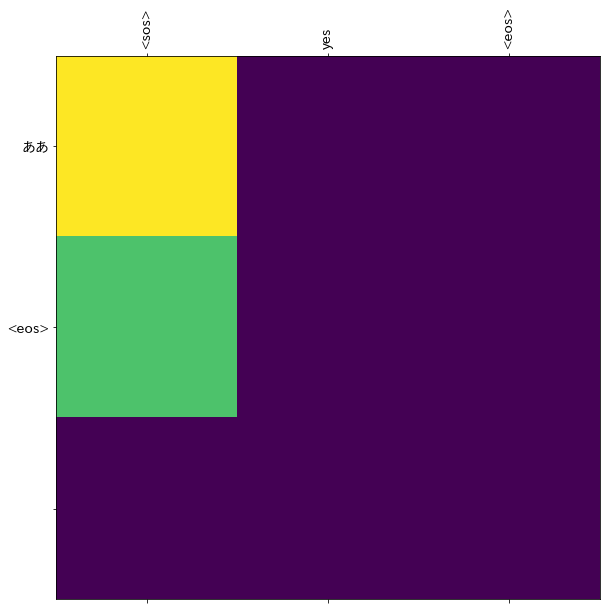

In [64]:
translate("yes")